In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.simplefilter('ignore')

Defining the problem

In [3]:
# Objective-
# Predict whether a credit card application is high risk or not.

# Target Variable-
# Target variable to predict: 'Is high risk' (Binary: 0 or 1)

# Context and Constraints-
# The model will be used in a real-world credit approval process.
# Computational resources are limited.

# Extra Remarks:
# The data will undergo preprocessing in order to manage missing values and other tasks.
# A variety of machine learning methods will be applied, including Decision Trees, Logistic Regression and many more.

EDA

In [4]:
#reads the csv file
data = pd.read_csv('Cerdit_card.csv') 

In [5]:
#prints 1st five rows
data.head() 

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [6]:
#prints last 5 rows
data.tail() 

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1.0,-5.0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3.0,-24.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2.0,-29.0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2.0,-37.0,0
29164,5062632,F,N,Y,0,585000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18858,-2010,1,0,1,0,NaN,2.0,-43.0,0


In [7]:
#to generate descriptive statistics for numeric columns
data.describe() 

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [8]:
# to number of rows and column in dataset
rowCol = data.shape
print(f"Rows = {rowCol[0]}, Coloumns = {rowCol[1]}")

Rows = 29165, Coloumns = 20


In [9]:
# All information About Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [10]:
#gives total number of null values in each column
data.isnull().sum() 

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [11]:
# filling most frquent null values in job title column
data['Job title'].fillna(data['Job title'].mode()[0], inplace=True)

In [12]:
# to check if any duplicate value in dataset
data.duplicated().any()

False

In [13]:
# Handling imbalance 
label_count = data['Is high risk'].value_counts()
print(label_count)

Is high risk
0    28666
1      499
Name: count, dtype: int64


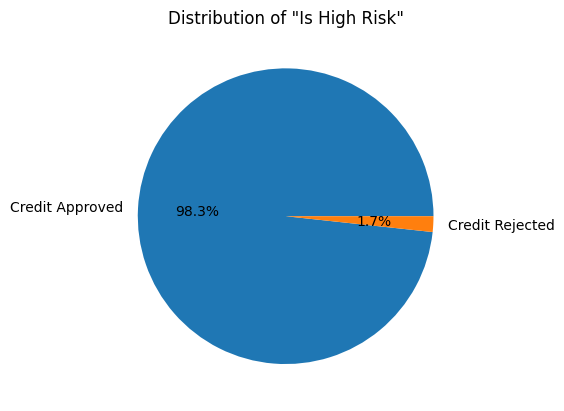

In [14]:
plt.pie(label_count, labels = ["Credit Approved","Credit Rejected"], autopct='%1.1f%%')
plt.title('Distribution of "Is High Risk"')
plt.show()

In [15]:
# to find the total income of all people
average_income = data['Income'].mean()
average_income

186890.38534201955

<Axes: >

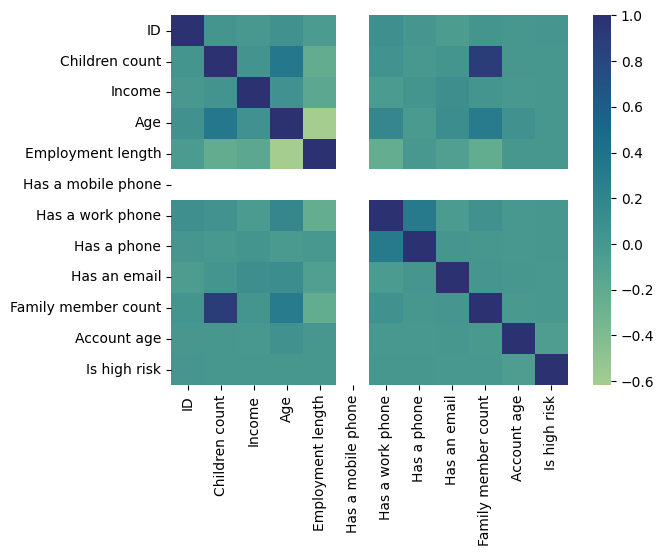

In [16]:
# Bivariate Analysis: Using heatmap and correlation analysis
numeric_df = data.select_dtypes(include=['float64','int64'])
sns.heatmap(numeric_df.corr(), cmap='crest')

In [17]:
# Univariate Analysis: Histogram,boxplot, frequency count,etc

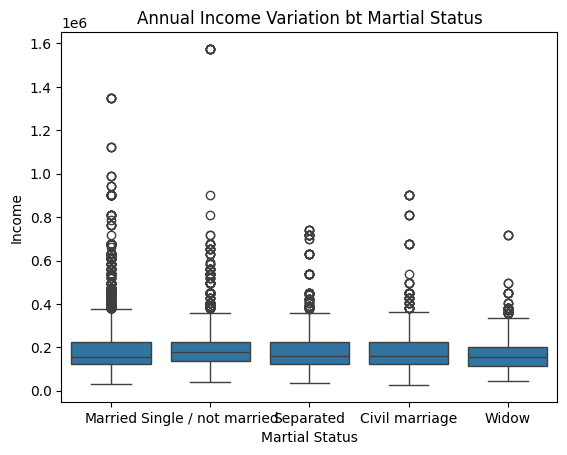

In [18]:
# Boxplot to visualize the distribution of 'Income' across different 'Marital Status' categories
sns.boxplot(x='Marital status', y = 'Income', data=data)
plt.title('Annual Income Variation bt Martial Status')
plt.xlabel('Martial Status')
plt.ylabel('Income')
plt.show()

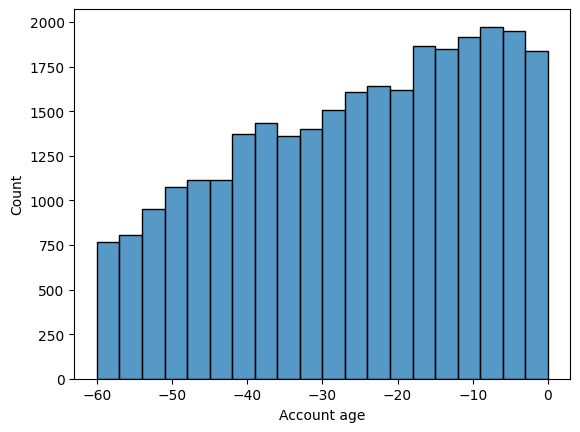

In [19]:
#Histogram for Account age vs Count
sns.histplot(data=data, x='Account age', bins=20, kde=False, edgecolor='black')
plt.show()

Feature Engineering

In [20]:
# Aggregation of dataset

In [21]:
# Dwelling' and sum of 'Family member count' for each group
data.groupby('Dwelling')['Family member count'].sum()

Dwelling
Co-op apartment          306.0
House / apartment      57238.0
Municipal apartment     1938.0
Office apartment         501.0
Rented apartment         894.0
With parents            3214.0
Name: Family member count, dtype: float64

In [22]:
# gender wise total income
gender_income = data.groupby('Gender')['Income'].mean()
gender_income.sort_values(ascending=False)

Gender
M    215303.878640
F    172914.010512
Name: Income, dtype: float64

In [23]:
# Deriving functions from dataset

In [24]:
# Create a new feature 'Total_Phone_Connections' by summing up mobile, work, and regular phones
data['Total_Phone_Connections'] = data['Has a mobile phone'] + data['Has a work phone'] + data['Has a phone']
data[['Total_Phone_Connections','Has a phone']]

,Total_Phone_Connections,Has a phone
0,1,0
1,1,0
2,1,0
3,1,0
4,2,1
...,...,...
29160,2,1
29161,1,0
29162,3,1
29163,2,1


In [25]:
# binary encoding using map function

In [26]:
data['Has a property'] = data['Has a property'].map({'Y': 0, 'N': 1})
data['Has a car'] = data['Has a car'].map({'Y': 0, 'N': 1})
data

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,...,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk,Total_Phone_Connections
0,5037048,M,0,0,0,135000.0,Working,Secondary / secondary special,Married,With parents,...,-3111,1,0,0,0,Core staff,2.0,-17.0,0,1
1,5044630,F,0,1,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-1651,1,0,0,0,Accountants,2.0,-1.0,0,1
2,5079079,F,1,0,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-5657,1,0,0,0,Laborers,4.0,-38.0,0,1
3,5112872,F,0,0,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-2046,1,0,0,1,Managers,1.0,-11.0,0,1
4,5105858,F,1,1,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,...,-515,1,0,1,0,Laborers,1.0,-41.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,1,0,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,1,Laborers,1.0,-5.0,0,2
29161,5029193,F,1,0,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-8256,1,0,0,0,Core staff,3.0,-24.0,0,1
29162,5047710,F,1,0,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,...,-3291,1,1,1,0,Managers,2.0,-29.0,0,3
29163,5009886,F,1,0,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,365243,1,0,1,0,Laborers,2.0,-37.0,0,2


Data preprocessing

In [27]:
# encoding categorial values
categorical_columns = ['Gender', 'Has a car', 'Has a property', 'Employment status',
                       'Education level', 'Marital status', 'Dwelling', 'Job title']

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in categorical_columns:
    data[col] = labelencoder.fit_transform(data[col])
data

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,...,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk,Total_Phone_Connections
0,5037048,1,0,0,0,135000.0,4,4,1,5,...,-3111,1,0,0,0,3,2.0,-17.0,0,1
1,5044630,0,0,1,1,135000.0,0,1,3,1,...,-1651,1,0,0,0,0,2.0,-1.0,0,1
2,5079079,0,1,0,2,180000.0,0,4,1,1,...,-5657,1,0,0,0,8,4.0,-38.0,0,1
3,5112872,0,0,0,0,360000.0,0,1,3,1,...,-2046,1,0,0,1,10,1.0,-11.0,0,1
4,5105858,0,1,1,0,270000.0,4,4,2,1,...,-515,1,0,1,0,8,1.0,-41.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,0,1,0,0,112500.0,1,4,3,1,...,365243,1,0,1,1,8,1.0,-5.0,0,2
29161,5029193,0,1,0,1,135000.0,0,4,1,1,...,-8256,1,0,0,0,3,3.0,-24.0,0,1
29162,5047710,0,1,0,0,76500.0,4,4,1,1,...,-3291,1,1,1,0,10,2.0,-29.0,0,3
29163,5009886,0,1,0,0,157500.0,1,4,0,1,...,365243,1,0,1,0,8,2.0,-37.0,0,2


In [29]:
# Handling Imbalance Data

In [30]:
normal = data[data['Is high risk']==0]
fraud = data[data['Is high risk']==1]

In [31]:
normal.shape

(28666, 21)

In [32]:
fraud.shape

(499, 21)

In [33]:
normal_sample = normal.sample(n=50)

In [34]:
normal_sample.shape

(50, 21)

In [35]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)
new_data['Is high risk'].value_counts()

Is high risk
1    499
0     50
Name: count, dtype: int64

In [36]:
# Store Feature Matrix In X And Response (Target) In Vector y
# Seprate Traget and train variable
X = new_data.drop('Is high risk',axis=1)    # contains independent variables
y = new_data['Is high risk']                #dependent/target variables

In [37]:
# splitting data in train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.20,random_state=42)
#20% in test set and 80% in train set 

In [38]:
# scaling dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.fit_transform(X_test)

Machine Learning Model Development

In [39]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaler_X_train,y_train)

LogisticRegression()

In [40]:
log_predict = log_model.predict(scaler_X_test)

In [41]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(scaler_X_train,y_train)

DecisionTreeClassifier()

In [42]:
tree_predit = tree_model.predict(scaler_X_test)

In [43]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(scaler_X_train,y_train)

RandomForestClassifier()

In [44]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(scaler_X_train,y_train)

AdaBoostClassifier()

In [45]:
rfc_predit = rfc_model.predict(scaler_X_test)
ada_predit = ada_model.predict(scaler_X_test)

Model Evalution

In [46]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [47]:
# Logistic Regression

In [48]:
accuracy_score(y_test,log_predict)

0.8909090909090909

In [49]:
precision_score(y_test,log_predict)

0.9150943396226415

In [50]:
recall_score(y_test,log_predict)

0.97

In [51]:
f1_score(y_test,log_predict)

0.941747572815534

In [52]:
# DecisionTreeClassifier
accuracy_score(y_test,tree_predit)

0.8909090909090909

In [53]:
precision_score(y_test,tree_predit)

0.9093023255813953

In [54]:
recall_score(y_test,tree_predit)

0.9775

In [55]:
f1_score(y_test,tree_predit)

0.9421686746987952

In [56]:
# RandomForestClassifier

In [57]:
accuracy_score(y_test,rfc_predit)

0.9090909090909091

In [58]:
precision_score(y_test,rfc_predit)

0.9090909090909091

In [59]:
recall_score(y_test,rfc_predit)

1.0

In [60]:
f1_score(y_test,rfc_predit)

0.9523809523809523

In [61]:
# AdaBoostClassifier

In [62]:
accuracy_score(y_test,ada_predit)

0.8818181818181818

In [63]:
precision_score(y_test,ada_predit)

0.9142857142857143

In [64]:
f1_score(y_test,ada_predit)

0.9365853658536586

In [65]:
recall_score(y_test,ada_predit)

0.96

In [66]:
final_data = pd.DataFrame({'Models':['LR','DT','RF','ADA'],
              "Accuracy":[accuracy_score(y_test,log_predict)*100,
                     accuracy_score(y_test,tree_predit)*100,
                     accuracy_score(y_test,rfc_predit)*100,
                     accuracy_score(y_test,ada_predit)*100
                    ]})
final_data

,Models,Accuracy
0,LR,89.090909
1,DT,89.090909
2,RF,90.909091
3,ADA,88.181818


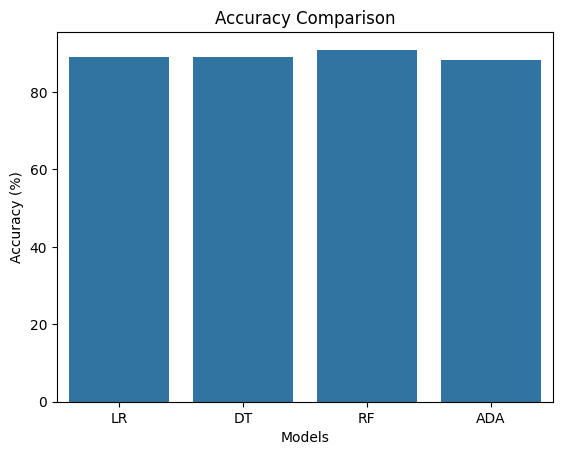

In [67]:
sns.barplot(x='Models', y='Accuracy', data=final_data)
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.show()

Predicting Credit Card Approval

In [68]:
# Random Forest Classifier has the best performance model

In [69]:
rf1 = RandomForestClassifier()
rf1.fit(X,y)

RandomForestClassifier()

In [70]:
X.shape #so X has 20 columns

(549, 20)

In [71]:
import joblib

In [72]:
joblib.dump(rf1,"Credit Card Prediction Model")

['Credit Card Prediction Model']

In [73]:
model =  joblib.load("Credit Card Prediction Model")

In [74]:
pred = model.predict([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [75]:
if pred == 0:
    print("Normal Transcation,Approved")
else:
    print("Fraudulent Transcation")
    print("Fraud")

Normal Transcation,Approved
